In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def load_data():
    X=np.load("data2/X.npy")
    y=np.load("data2/y.npy")

    return X,y

In [3]:
X_train,y_train=load_data()

print(X_train.shape)
print(y_train.shape)

(5000, 400)
(5000, 1)


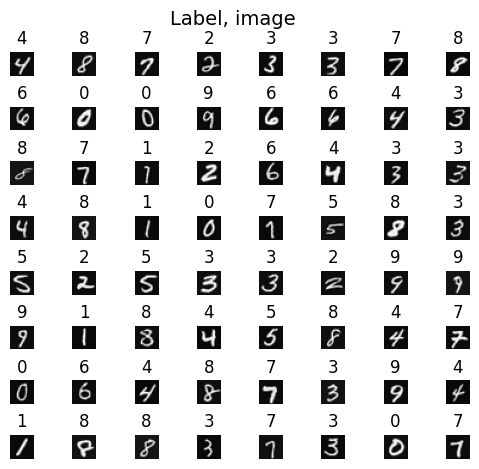

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
# widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_train_random_reshaped = X_train[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_train_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [5]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=((400,))),
    tf.keras.layers.Dense(units=25,activation="relu", name="layer1"),
    tf.keras.layers.Dense(units=15,activation="relu", name="layer2"),
    tf.keras.layers.Dense(units=10,activation="linear", name="layer3"),
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [7]:
[layer1, layer2, layer3] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [8]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),)
model.fit(X_train,y_train,
        epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 1ms/step - loss: 1.4680
Epoch 2/40
157/157 [==============================] - 0s 1ms/step - loss: 0.6001
Epoch 3/40
157/157 [==============================] - 0s 1ms/step - loss: 0.4143
Epoch 4/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3464
Epoch 5/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3030
Epoch 6/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2760
Epoch 7/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2576
Epoch 8/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2427
Epoch 9/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2237
Epoch 10/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2120
Epoch 11/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1996
Epoch 12/40
157/157 [==============================] - 0s 1ms/step - loss: 0.1931
Epoch 13/40
157/157 [====

In [9]:
logits=model(X_train[4786].reshape(1,400))
prediction_p=tf.nn.softmax(logits)
print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[3.3918443e-10 1.5142154e-04 1.8860463e-06 1.6812234e-03 2.3922861e-02
  2.5937890e-04 2.3961094e-08 1.7142157e-03 9.9998526e-03 9.6226913e-01]]
Total of predictions: 1.000


In [10]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat} real value is {y_train[4786]}")

np.argmax(prediction_p): 9 real value is [9]


In [11]:
m=X_train.shape[0]
correct=0
for i in range(m):
    logits=model(X_train[i].reshape(1,400))
    prediction_p=tf.nn.softmax(logits)
    yhat = np.argmax(prediction_p)

    if yhat==y_train[i]:
        correct+=1
    
print(correct)
    

4952


1/1 [==============================] - 0s 16ms/step


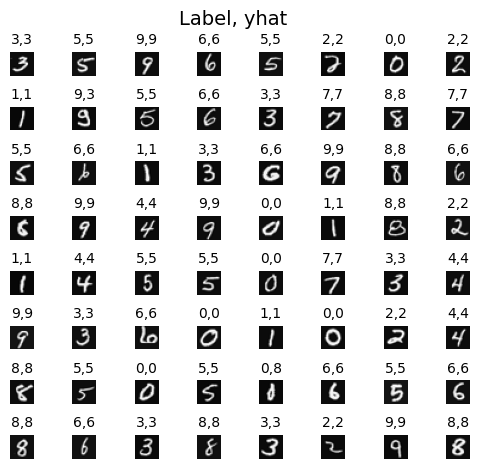

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
# widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_train_random_reshaped = X_train[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_train_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_train[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()
